# 十分钟入门pandas

In [1]:
#coding:utf8
%matplotlib inline

这个一篇针对pandas新手的简短入门，想要了解更多复杂的内容，参阅[*Cookbook*](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

通常，我们首先要导入以下几个库：

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 创建对象

通过传递一个list来创建**Series**，pandas会默认创建整型索引：

In [3]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

通过传递一个numpy array，日期索引以及列标签来创建一个**DataFrame**：

In [4]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.021371,1.719762,-0.598220,0.923230
2013-01-02,0.137526,1.557110,-0.598932,-0.610422
2013-01-03,0.230005,-0.561048,-2.314224,-1.184303
2013-01-04,-2.637752,0.026460,0.396797,1.080666
2013-01-05,1.212802,0.508466,2.201802,-0.733729
2013-01-06,1.368769,-0.151341,1.783241,-0.746505


通过传递一个能够被转换为类似series的dict对象来创建一个**DataFrame**:

In [6]:
df2 = pd.DataFrame({ 'A' : 1.,
                     'B' : pd.Timestamp('20130102'),
                     'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                     'D' : np.array([3]*4,dtype='int32'),
                     'E' : pd.Categorical(["test","train","test","train"]),
                     'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


可以看到各列的数据类型为：

In [7]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

# 查看数据

查看frame中头部和尾部的几行：

In [8]:
df.head()

,A,B,C,D
2013-01-01,-0.021371,1.719762,-0.598220,0.923230
2013-01-02,0.137526,1.557110,-0.598932,-0.610422
2013-01-03,0.230005,-0.561048,-2.314224,-1.184303
2013-01-04,-2.637752,0.026460,0.396797,1.080666
2013-01-05,1.212802,0.508466,2.201802,-0.733729


In [9]:
df.tail(3)

,A,B,C,D
2013-01-04,-2.637752,0.026460,0.396797,1.080666
2013-01-05,1.212802,0.508466,2.201802,-0.733729
2013-01-06,1.368769,-0.151341,1.783241,-0.746505


显示索引、列名以及底层的numpy数据

In [10]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [11]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [12]:
df.values

array([[-0.02137115,  1.71976228, -0.59821961,  0.9232295 ],
       [ 0.1375255 ,  1.55710993, -0.59893208, -0.61042151],
       [ 0.23000461, -0.56104814, -2.31422423, -1.18430305],
       [-2.63775198,  0.0264604 ,  0.39679709,  1.08066551],
       [ 1.21280238,  0.50846555,  2.20180155, -0.73372945],
       [ 1.36876918, -0.15134147,  1.78324075, -0.7465053 ]])

describe()能对数据做一个快速统计汇总

In [13]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.048330,0.516568,0.145077,-0.211844
std,1.439473,0.935739,1.681146,0.961430
min,-2.637752,-0.561048,-2.314224,-1.184303
25%,0.018353,-0.106891,-0.598754,-0.743311
50%,0.183765,0.267463,-0.100711,-0.672075
75%,0.967103,1.294949,1.436630,0.539817
max,1.368769,1.719762,2.201802,1.080666


对数据做转置：

In [14]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.021371,0.137526,0.230005,-2.637752,1.212802,1.368769
B,1.719762,1.557110,-0.561048,0.026460,0.508466,-0.151341
C,-0.598220,-0.598932,-2.314224,0.396797,2.201802,1.783241
D,0.923230,-0.610422,-1.184303,1.080666,-0.733729,-0.746505


按轴进行排序：

In [15]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,0.923230,-0.598220,1.719762,-0.021371
2013-01-02,-0.610422,-0.598932,1.557110,0.137526
2013-01-03,-1.184303,-2.314224,-0.561048,0.230005
2013-01-04,1.080666,0.396797,0.026460,-2.637752
2013-01-05,-0.733729,2.201802,0.508466,1.212802
2013-01-06,-0.746505,1.783241,-0.151341,1.368769


按值进行排序 :

In [16]:
df.sort_values(by='B')

,A,B,C,D
2013-01-03,0.230005,-0.561048,-2.314224,-1.184303
2013-01-06,1.368769,-0.151341,1.783241,-0.746505
2013-01-04,-2.637752,0.026460,0.396797,1.080666
2013-01-05,1.212802,0.508466,2.201802,-0.733729
2013-01-02,0.137526,1.557110,-0.598932,-0.610422
2013-01-01,-0.021371,1.719762,-0.598220,0.923230


# 数据选择

注意：虽然标准的Python/Numpy的表达式能完成选择与赋值等功能，但我们仍推荐使用优化过的pandas数据访问方法：.at，.iat，.loc，.iloc和.ix

## 选取

选择某一列数据，它会返回一个**Series**，等同于**df.A**：

In [17]:
df['A']

2013-01-01   -0.021371
2013-01-02    0.137526
2013-01-03    0.230005
2013-01-04   -2.637752
2013-01-05    1.212802
2013-01-06    1.368769
Freq: D, Name: A, dtype: float64

通过使用**[ ]**进行切片选取：

In [18]:
df[0:3]

,A,B,C,D
2013-01-01,-0.021371,1.719762,-0.598220,0.923230
2013-01-02,0.137526,1.557110,-0.598932,-0.610422
2013-01-03,0.230005,-0.561048,-2.314224,-1.184303


In [19]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.137526,1.557110,-0.598932,-0.610422
2013-01-03,0.230005,-0.561048,-2.314224,-1.184303
2013-01-04,-2.637752,0.026460,0.396797,1.080666


## 通过标签选取

通过标签进行交叉选取：

In [20]:
df.loc[dates[0]]

A   -0.021371
B    1.719762
C   -0.598220
D    0.923230
Name: 2013-01-01 00:00:00, dtype: float64

使用标签对多个轴进行选取

In [21]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.021371,1.719762
2013-01-02,0.137526,1.557110
2013-01-03,0.230005,-0.561048
2013-01-04,-2.637752,0.026460
2013-01-05,1.212802,0.508466
2013-01-06,1.368769,-0.151341


In [22]:
df.loc[:,['A','B']][:3]

,A,B
2013-01-01,-0.021371,1.719762
2013-01-02,0.137526,1.557110
2013-01-03,0.230005,-0.561048


进行标签切片，包含两个端点

In [23]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.137526,1.557110
2013-01-03,0.230005,-0.561048
2013-01-04,-2.637752,0.026460


对于返回的对象进行降维处理

In [24]:
df.loc['20130102',['A','B']]

A    0.137526
B    1.557110
Name: 2013-01-02 00:00:00, dtype: float64

获取一个标量

In [25]:
df.loc[dates[0],'A']

-0.021371148933445445

快速获取标量（与上面的方法等价）

In [26]:
df.at[dates[0],'A']

-0.021371148933445445

## 通过位置选取

通过传递整型的位置进行选取

In [27]:
df.iloc[3]

A   -2.637752
B    0.026460
C    0.396797
D    1.080666
Name: 2013-01-04 00:00:00, dtype: float64

通过整型的位置切片进行选取，与python/numpy形式相同

In [28]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,-2.637752,0.026460
2013-01-05,1.212802,0.508466


只对行进行切片

In [29]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.137526,1.557110,-0.598932,-0.610422
2013-01-03,0.230005,-0.561048,-2.314224,-1.184303


只对列进行切片

In [30]:
df.iloc[:,1:3]

,B,C
2013-01-01,1.719762,-0.598220
2013-01-02,1.557110,-0.598932
2013-01-03,-0.561048,-2.314224
2013-01-04,0.026460,0.396797
2013-01-05,0.508466,2.201802
2013-01-06,-0.151341,1.783241


只获取某个值

In [31]:
df.iloc[1,1]

1.5571099262510828

快速获取某个值（与上面的方法等价）

In [32]:
df.iat[1,1]

1.5571099262510828

## 布尔索引

用某列的值来选取数据

In [33]:
df[df.A > 0]

,A,B,C,D
2013-01-02,0.137526,1.557110,-0.598932,-0.610422
2013-01-03,0.230005,-0.561048,-2.314224,-1.184303
2013-01-05,1.212802,0.508466,2.201802,-0.733729
2013-01-06,1.368769,-0.151341,1.783241,-0.746505


用**where**操作来选取数据

In [34]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,1.719762,NaN,0.923230
2013-01-02,0.137526,1.557110,NaN,NaN
2013-01-03,0.230005,NaN,NaN,NaN
2013-01-04,NaN,0.026460,0.396797,1.080666
2013-01-05,1.212802,0.508466,2.201802,NaN
2013-01-06,1.368769,NaN,1.783241,NaN


用**isin()**方法来过滤数据

In [35]:
df2 = df.copy()

In [36]:
df2['E'] = ['one', 'one', 'two', 'three', 'four', 'three']
df2

,A,B,C,D,E
2013-01-01,-0.021371,1.719762,-0.598220,0.923230,one
2013-01-02,0.137526,1.557110,-0.598932,-0.610422,one
2013-01-03,0.230005,-0.561048,-2.314224,-1.184303,two
2013-01-04,-2.637752,0.026460,0.396797,1.080666,three
2013-01-05,1.212802,0.508466,2.201802,-0.733729,four
2013-01-06,1.368769,-0.151341,1.783241,-0.746505,three


In [37]:
df2[df2['E'].isin(['two', 'four'])]

,A,B,C,D,E
2013-01-03,0.230005,-0.561048,-2.314224,-1.184303,two
2013-01-05,1.212802,0.508466,2.201802,-0.733729,four


## 赋值

赋值一个新的列，通过索引来自动对齐数据

In [38]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102',periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [39]:
df['F'] = s1
df

,A,B,C,D,F
2013-01-01,-0.021371,1.719762,-0.598220,0.923230,NaN
2013-01-02,0.137526,1.557110,-0.598932,-0.610422,1.0
2013-01-03,0.230005,-0.561048,-2.314224,-1.184303,2.0
2013-01-04,-2.637752,0.026460,0.396797,1.080666,3.0
2013-01-05,1.212802,0.508466,2.201802,-0.733729,4.0
2013-01-06,1.368769,-0.151341,1.783241,-0.746505,5.0


通过标签赋值

In [40]:
df.at[dates[0], 'A'] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,1.719762,-0.598220,0.923230,NaN
2013-01-02,0.137526,1.557110,-0.598932,-0.610422,1.0
2013-01-03,0.230005,-0.561048,-2.314224,-1.184303,2.0
2013-01-04,-2.637752,0.026460,0.396797,1.080666,3.0
2013-01-05,1.212802,0.508466,2.201802,-0.733729,4.0
2013-01-06,1.368769,-0.151341,1.783241,-0.746505,5.0


通过位置赋值

In [41]:
df.iat[0,1] = 0
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.598220,0.923230,NaN
2013-01-02,0.137526,1.557110,-0.598932,-0.610422,1.0
2013-01-03,0.230005,-0.561048,-2.314224,-1.184303,2.0
2013-01-04,-2.637752,0.026460,0.396797,1.080666,3.0
2013-01-05,1.212802,0.508466,2.201802,-0.733729,4.0
2013-01-06,1.368769,-0.151341,1.783241,-0.746505,5.0


通过传递numpy array赋值

In [42]:
df.loc[:,'D'] = np.array([5] * len(df))
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.598220,5,NaN
2013-01-02,0.137526,1.557110,-0.598932,5,1.0
2013-01-03,0.230005,-0.561048,-2.314224,5,2.0
2013-01-04,-2.637752,0.026460,0.396797,5,3.0
2013-01-05,1.212802,0.508466,2.201802,5,4.0
2013-01-06,1.368769,-0.151341,1.783241,5,5.0


通过**where**操作来赋值

In [43]:
df2 = df.copy()
df2[df2 > 0] = -df2
df2

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.598220,-5,NaN
2013-01-02,-0.137526,-1.557110,-0.598932,-5,-1.0
2013-01-03,-0.230005,-0.561048,-2.314224,-5,-2.0
2013-01-04,-2.637752,-0.026460,-0.396797,-5,-3.0
2013-01-05,-1.212802,-0.508466,-2.201802,-5,-4.0
2013-01-06,-1.368769,-0.151341,-1.783241,-5,-5.0


# 缺失值处理

在pandas中，用**np.nan**来代表缺失值，这些值默认不会参与运算。

reindex()允许你修改、增加、删除指定轴上的索引，并返回一个数据副本。

In [44]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns)+['E'])
df1.loc[dates[0]:dates[1],'E'] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.598220,5,NaN,1.0
2013-01-02,0.137526,1.557110,-0.598932,5,1.0,1.0
2013-01-03,0.230005,-0.561048,-2.314224,5,2.0,NaN
2013-01-04,-2.637752,0.026460,0.396797,5,3.0,NaN


剔除所有包含缺失值的行数据

In [45]:
df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,0.137526,1.55711,-0.598932,5,1.0,1.0


填充缺失值

In [46]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.598220,5,5.0,1.0
2013-01-02,0.137526,1.557110,-0.598932,5,1.0,1.0
2013-01-03,0.230005,-0.561048,-2.314224,5,2.0,5.0
2013-01-04,-2.637752,0.026460,0.396797,5,3.0,5.0


获取值是否为**nan**的布尔标记

In [47]:
pd.isnull(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


# 运算

## 统计

运算过程中，通常不包含缺失值。

进行描述性统计

In [48]:
df.mean()

A    0.051892
B    0.229941
C    0.145077
D    5.000000
F    3.000000
dtype: float64

对其他轴进行同样的运算

In [49]:
df.mean(1)

2013-01-01    1.100445
2013-01-02    1.419141
2013-01-03    0.870946
2013-01-04    1.157101
2013-01-05    2.584614
2013-01-06    2.600134
Freq: D, dtype: float64

对于拥有不同维度的对象进行运算时需要对齐。除此之外，pandas会自动沿着指定维度计算。

In [50]:
s = pd.Series([1,3,5,np.nan,6,8], index=dates).shift(2)
s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    3.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [51]:
df.sub(s, axis='index')

,A,B,C,D,F
2013-01-01,NaN,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN,NaN
2013-01-03,-0.769995,-1.561048,-3.314224,4.0,1.0
2013-01-04,-5.637752,-2.973540,-2.603203,2.0,0.0
2013-01-05,-3.787198,-4.491534,-2.798198,0.0,-1.0
2013-01-06,NaN,NaN,NaN,NaN,NaN


## Apply 函数作用

通过apply()对函数作用

In [52]:
df.apply(np.cumsum)

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.598220,5,NaN
2013-01-02,0.137526,1.557110,-1.197152,10,1.0
2013-01-03,0.367530,0.996062,-3.511376,15,3.0
2013-01-04,-2.270222,1.022522,-3.114579,20,6.0
2013-01-05,-1.057419,1.530988,-0.912777,25,10.0
2013-01-06,0.311350,1.379646,0.870463,30,15.0


In [53]:
df.apply(lambda x:x.max()-x.min())

A    4.006521
B    2.118158
C    4.516026
D    0.000000
F    4.000000
dtype: float64

## 频数统计

In [54]:
s = pd.Series(np.random.randint(0, 7, size=10))
s

0    2
1    3
2    5
3    5
4    0
5    4
6    6
7    0
8    2
9    6
dtype: int32

In [55]:
s.value_counts()

6    2
5    2
2    2
0    2
4    1
3    1
dtype: int64

## 字符串方法

对于Series对象，在其str属性中有着一系列的字符串处理方法。就如同下段代码一样，能很方便的对array中各个元素进行运算。值得注意的是，在str属性中的模式匹配默认使用正则表达式。

In [56]:
s = pd.Series(['A', 'B', 'C', 'Aaba', 'Baca', np.nan, 'CABA', 'dog', 'cat'])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

# 合并

## Concat 连接

pandas中提供了大量的方法能够轻松对Series，DataFrame和Panel对象进行不同满足逻辑关系的合并操作

通过**concat()**来连接pandas对象

In [57]:
df = pd.DataFrame(np.random.randn(10,4))
df

,0,1,2,3
0,0.393119,-1.206767,-1.112395,0.484553
1,0.770230,0.747292,-0.248552,0.878156
2,-1.790634,-2.298525,-0.299926,0.049387
3,0.227285,-0.122430,0.017060,-1.029803
4,-1.143173,0.056900,0.149728,-2.208764
5,-0.774815,0.194492,1.973115,1.523422
6,-0.712301,0.621960,0.837159,1.145914
7,-0.024071,1.035085,1.925814,2.441632
8,-1.378168,-1.852513,-0.565105,0.105235
9,-0.125265,-0.399306,-0.822670,0.687122


In [58]:
#break it into pieces
pieces = [df[:3], df[3:7], df[7:]]
pieces

[          0         1         2         3
 0  0.393119 -1.206767 -1.112395  0.484553
 1  0.770230  0.747292 -0.248552  0.878156
 2 -1.790634 -2.298525 -0.299926  0.049387,
           0         1         2         3
 3  0.227285 -0.122430  0.017060 -1.029803
 4 -1.143173  0.056900  0.149728 -2.208764
 5 -0.774815  0.194492  1.973115  1.523422
 6 -0.712301  0.621960  0.837159  1.145914,
           0         1         2         3
 7 -0.024071  1.035085  1.925814  2.441632
 8 -1.378168 -1.852513 -0.565105  0.105235
 9 -0.125265 -0.399306 -0.822670  0.687122]

In [59]:
pd.concat(pieces)

,0,1,2,3
0,0.393119,-1.206767,-1.112395,0.484553
1,0.770230,0.747292,-0.248552,0.878156
2,-1.790634,-2.298525,-0.299926,0.049387
3,0.227285,-0.122430,0.017060,-1.029803
4,-1.143173,0.056900,0.149728,-2.208764
5,-0.774815,0.194492,1.973115,1.523422
6,-0.712301,0.621960,0.837159,1.145914
7,-0.024071,1.035085,1.925814,2.441632
8,-1.378168,-1.852513,-0.565105,0.105235
9,-0.125265,-0.399306,-0.822670,0.687122


## Join 合并

类似于SQL中的合并(merge)

In [60]:
left = pd.DataFrame({'key':['foo', 'foo'], 'lval':[1,2]})
left

,key,lval
0,foo,1
1,foo,2


In [61]:
right = pd.DataFrame({'key':['foo', 'foo'], 'lval':[4,5]})
right

,key,lval
0,foo,4
1,foo,5


In [62]:
pd.merge(left, right, on='key')

,key,lval_x,lval_y
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Append 添加

将若干行添加到dataFrame后面

In [63]:
df = pd.DataFrame(np.random.randn(8, 4), columns=['A', 'B', 'C', 'D'])
df

,A,B,C,D
0,0.005487,-0.579113,0.837242,-0.554708
1,0.101463,-0.341813,-0.466579,-1.937227
2,0.213729,-0.121251,-0.019713,1.950511
3,0.403874,-1.138057,-0.767938,-0.276550
4,0.701247,-1.354102,-1.846086,2.891280
5,-0.206686,-0.676310,-1.402999,-0.664408
6,1.218429,0.244292,0.445398,0.669001
7,0.062429,-0.410193,0.231103,0.707197


In [64]:
s = df.iloc[3]
s

A    0.403874
B   -1.138057
C   -0.767938
D   -0.276550
Name: 3, dtype: float64

In [65]:
df.append(s, ignore_index=True)

,A,B,C,D
0,0.005487,-0.579113,0.837242,-0.554708
1,0.101463,-0.341813,-0.466579,-1.937227
2,0.213729,-0.121251,-0.019713,1.950511
3,0.403874,-1.138057,-0.767938,-0.276550
4,0.701247,-1.354102,-1.846086,2.891280
5,-0.206686,-0.676310,-1.402999,-0.664408
6,1.218429,0.244292,0.445398,0.669001
7,0.062429,-0.410193,0.231103,0.707197
8,0.403874,-1.138057,-0.767938,-0.276550


# 分组

对于“group by”操作，我们通常是指以下一个或几个步骤：
* **划分** 按照某些标准将数据分为不同的组
* **应用** 对每组数据分别执行一个函数
* **组合** 将结果组合到一个数据结构

In [66]:
df = pd.DataFrame({'A' : ['foo', 'bar', 'foo', 'bar', 
                          'foo', 'bar', 'foo', 'bar'],
                   'B' : ['one', 'one', 'two', 'three', 
                          'two', 'two', 'one', 'three'],
                   'C' : np.random.randn(8),
                   'D' : np.random.randn(8)})
df

,A,B,C,D
0,foo,one,1.749514,2.014065
1,bar,one,0.723148,-0.793304
2,foo,two,0.237088,-1.050331
3,bar,three,-0.920617,0.642856
4,foo,two,0.533194,-1.536203
5,bar,two,0.537459,0.608694
6,foo,one,0.393967,0.449082
7,bar,three,-0.045706,0.351294


分组并对每个分组应用sum函数

In [67]:
df.groupby('A').sum()

,C,D
A,,
bar,0.294285,0.809541
foo,2.913764,-0.123387


按多个列分组形成层级索引，然后应用函数

In [68]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.723148 -0.793304
    three -0.966322  0.994151
    two    0.537459  0.608694
foo one    2.143481  2.463146
    two    0.770283 -2.586533

# 变形

## 堆叠

In [69]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                     'foo', 'foo', 'qux', 'qux'],
                    ['one', 'two', 'one', 'two',
                     'one', 'two', 'one', 'two']]))

In [70]:
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

In [71]:
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])

In [72]:
df2 = df[:4]
df2

A         B
first second                    
bar   one     1.570673  1.170706
      two     1.289252  1.504117
baz   one    -1.253928 -0.874609
      two     0.516724  0.667627

**stack()**方法对DataFrame的列“压缩”一个层级

In [73]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.570673
               B    1.170706
       two     A    1.289252
               B    1.504117
baz    one     A   -1.253928
               B   -0.874609
       two     A    0.516724
               B    0.667627
dtype: float64

对于一个“堆叠过的”DataFrame或者Series（拥有MultiIndex作为索引），**stack()**的逆操作是**unstack()**，默认反堆叠到上一个层级

In [74]:
stacked.unstack()

A         B
first second                    
bar   one     1.570673  1.170706
      two     1.289252  1.504117
baz   one    -1.253928 -0.874609
      two     0.516724  0.667627

In [75]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.570673  1.289252
      B  1.170706  1.504117
baz   A -1.253928  0.516724
      B -0.874609  0.667627

In [76]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.570673 -1.253928
       B  1.170706 -0.874609
two    A  1.289252  0.516724
       B  1.504117  0.667627

## 数据透视表

In [77]:
df = pd.DataFrame({'A' : ['one', 'one', 'two', 'three'] * 3,
                   'B' : ['A', 'B', 'C'] * 4,
                   'C' : ['foo', 'foo', 'foo', 'bar', 'bar', 'bar'] * 2,
                   'D' : np.random.randn(12),
                   'E' : np.random.randn(12)})
df

,A,B,C,D,E
0,one,A,foo,-0.871343,0.175378
1,one,B,foo,-0.396356,-0.450278
2,two,C,foo,-0.150234,0.560830
3,three,A,bar,0.379926,1.890097
4,one,B,bar,-0.613450,1.513220
5,one,C,bar,-0.770945,2.061355
6,two,A,foo,-1.358030,-0.857448
7,three,B,foo,0.663129,0.037400
8,one,C,foo,-1.406949,0.068769
9,one,A,bar,1.356176,-0.632811


 我们可以轻松地从这个数据得到透视表

In [78]:
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C             bar       foo
A     B                    
one   A  1.356176 -0.871343
      B -0.613450 -0.396356
      C -0.770945 -1.406949
three A  0.379926       NaN
      B       NaN  0.663129
      C -0.156608       NaN
two   A       NaN -1.358030
      B  0.495807       NaN
      C       NaN -0.150234

# 时间序列

pandas在对频率转换进行重新采样时拥有着简单，强大而且高效的功能（例如把按秒采样的数据转换为按5分钟采样的数据）。这在金融领域很常见，但又不限于此。

In [79]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
rng

DatetimeIndex(['2012-01-01 00:00:00', '2012-01-01 00:00:01',
               '2012-01-01 00:00:02', '2012-01-01 00:00:03',
               '2012-01-01 00:00:04', '2012-01-01 00:00:05',
               '2012-01-01 00:00:06', '2012-01-01 00:00:07',
               '2012-01-01 00:00:08', '2012-01-01 00:00:09',
               '2012-01-01 00:00:10', '2012-01-01 00:00:11',
               '2012-01-01 00:00:12', '2012-01-01 00:00:13',
               '2012-01-01 00:00:14', '2012-01-01 00:00:15',
               '2012-01-01 00:00:16', '2012-01-01 00:00:17',
               '2012-01-01 00:00:18', '2012-01-01 00:00:19',
               '2012-01-01 00:00:20', '2012-01-01 00:00:21',
               '2012-01-01 00:00:22', '2012-01-01 00:00:23',
               '2012-01-01 00:00:24', '2012-01-01 00:00:25',
               '2012-01-01 00:00:26', '2012-01-01 00:00:27',
               '2012-01-01 00:00:28', '2012-01-01 00:00:29',
               '2012-01-01 00:00:30', '2012-01-01 00:00:31',
               '2012-01-

In [80]:
ts = pd.Series(np.random.randint(0,500,len(rng)), index=rng)
ts

2012-01-01 00:00:00    251
2012-01-01 00:00:01     62
2012-01-01 00:00:02    351
2012-01-01 00:00:03    148
2012-01-01 00:00:04    271
                      ... 
2012-01-01 00:01:35    370
2012-01-01 00:01:36    144
2012-01-01 00:01:37    325
2012-01-01 00:01:38    175
2012-01-01 00:01:39     93
Freq: S, Length: 100, dtype: int32

In [81]:
ts.resample('5Min', how='sum')

TypeError: resample() got an unexpected keyword argument 'how'

时区表示

In [82]:
rng = pd.date_range('3/6/2012', periods=5, freq='D')
rng

DatetimeIndex(['2012-03-06', '2012-03-07', '2012-03-08', '2012-03-09',
               '2012-03-10'],
              dtype='datetime64[ns]', freq='D')

In [83]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-03-06    0.072618
2012-03-07   -0.019551
2012-03-08    0.792907
2012-03-09   -0.752751
2012-03-10    0.891038
Freq: D, dtype: float64

In [84]:
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00    0.072618
2012-03-07 00:00:00+00:00   -0.019551
2012-03-08 00:00:00+00:00    0.792907
2012-03-09 00:00:00+00:00   -0.752751
2012-03-10 00:00:00+00:00    0.891038
Freq: D, dtype: float64

时区转换

In [85]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.072618
2012-03-06 19:00:00-05:00   -0.019551
2012-03-07 19:00:00-05:00    0.792907
2012-03-08 19:00:00-05:00   -0.752751
2012-03-09 19:00:00-05:00    0.891038
Freq: D, dtype: float64

时间跨度转换

In [86]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
rng

DatetimeIndex(['2012-01-31', '2012-02-29', '2012-03-31', '2012-04-30',
               '2012-05-31'],
              dtype='datetime64[ns]', freq='M')

In [87]:
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

2012-01-31    1.432140
2012-02-29    0.481762
2012-03-31    0.937618
2012-04-30   -1.302658
2012-05-31   -0.291566
Freq: M, dtype: float64

In [88]:
ps = ts.to_period()
ps

2012-01    1.432140
2012-02    0.481762
2012-03    0.937618
2012-04   -1.302658
2012-05   -0.291566
Freq: M, dtype: float64

In [89]:
ps.to_timestamp()

2012-01-01    1.432140
2012-02-01    0.481762
2012-03-01    0.937618
2012-04-01   -1.302658
2012-05-01   -0.291566
Freq: MS, dtype: float64

日期与时间戳之间的转换使得可以使用一些方便的算术函数。例如，我们把以11月为年底的季度数据转换为当前季度末月底为始的数据

In [90]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
prng

PeriodIndex(['1990Q1', '1990Q2', '1990Q3', '1990Q4', '1991Q1', '1991Q2',
             '1991Q3', '1991Q4', '1992Q1', '1992Q2', '1992Q3', '1992Q4',
             '1993Q1', '1993Q2', '1993Q3', '1993Q4', '1994Q1', '1994Q2',
             '1994Q3', '1994Q4', '1995Q1', '1995Q2', '1995Q3', '1995Q4',
             '1996Q1', '1996Q2', '1996Q3', '1996Q4', '1997Q1', '1997Q2',
             '1997Q3', '1997Q4', '1998Q1', '1998Q2', '1998Q3', '1998Q4',
             '1999Q1', '1999Q2', '1999Q3', '1999Q4', '2000Q1', '2000Q2',
             '2000Q3', '2000Q4'],
            dtype='period[Q-NOV]', freq='Q-NOV')

In [91]:
ts = pd.Series(np.random.randn(len(prng)), index = prng)
ts

1990Q1   -0.104937
1990Q2    0.000645
1990Q3   -1.909108
1990Q4    1.342766
1991Q1    0.671432
1991Q2    0.393320
1991Q3    1.166736
1991Q4   -0.143839
1992Q1   -0.288294
1992Q2   -1.012998
1992Q3   -0.707360
1992Q4    0.377527
1993Q1    1.566386
1993Q2   -1.090577
1993Q3    0.455040
1993Q4   -1.076924
1994Q1   -0.242289
1994Q2    1.985280
1994Q3    0.274308
1994Q4   -1.341175
1995Q1    0.822466
1995Q2   -1.591615
1995Q3    0.165947
1995Q4    1.543778
1996Q1   -0.610950
1996Q2    0.274074
1996Q3    0.180520
1996Q4   -1.062968
1997Q1    0.667746
1997Q2    1.545463
1997Q3   -0.240450
1997Q4   -0.299258
1998Q1    0.920691
1998Q2    0.295623
1998Q3   -1.146844
1998Q4    1.160024
1999Q1   -1.198494
1999Q2   -0.804922
1999Q3   -1.128741
1999Q4    1.068067
2000Q1   -0.337209
2000Q2   -0.593416
2000Q3   -0.169543
2000Q4   -0.500042
Freq: Q-NOV, dtype: float64

In [92]:
ts.index = (prng.asfreq('M', 'end') ) .asfreq('H', 'start') +9
ts

1990-02-01 09:00   -0.104937
1990-05-01 09:00    0.000645
1990-08-01 09:00   -1.909108
1990-11-01 09:00    1.342766
1991-02-01 09:00    0.671432
1991-05-01 09:00    0.393320
1991-08-01 09:00    1.166736
1991-11-01 09:00   -0.143839
1992-02-01 09:00   -0.288294
1992-05-01 09:00   -1.012998
1992-08-01 09:00   -0.707360
1992-11-01 09:00    0.377527
1993-02-01 09:00    1.566386
1993-05-01 09:00   -1.090577
1993-08-01 09:00    0.455040
1993-11-01 09:00   -1.076924
1994-02-01 09:00   -0.242289
1994-05-01 09:00    1.985280
1994-08-01 09:00    0.274308
1994-11-01 09:00   -1.341175
1995-02-01 09:00    0.822466
1995-05-01 09:00   -1.591615
1995-08-01 09:00    0.165947
1995-11-01 09:00    1.543778
1996-02-01 09:00   -0.610950
1996-05-01 09:00    0.274074
1996-08-01 09:00    0.180520
1996-11-01 09:00   -1.062968
1997-02-01 09:00    0.667746
1997-05-01 09:00    1.545463
1997-08-01 09:00   -0.240450
1997-11-01 09:00   -0.299258
1998-02-01 09:00    0.920691
1998-05-01 09:00    0.295623
1998-08-01 09:

# 分类

从版本0.15开始，pandas在**DataFrame**中开始包括分类数据。

In [93]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a', 'b', 'b', 'a', 'e', 'e']})
df

,id,raw_grade
0,1,a
1,2,b
2,3,b
3,4,a
4,5,e
5,6,e


把raw_grade转换为分类类型

In [94]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    e
5    e
Name: grade, dtype: category
Categories (3, object): [a, b, e]

重命名类别名为更有意义的名称

In [95]:
df["grade"].cat.categories = ["very good", "good", "very bad"]

对分类重新排序，并添加缺失的分类

In [96]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    very good
1         good
2         good
3    very good
4     very bad
5     very bad
Name: grade, dtype: category
Categories (5, object): [very bad, bad, medium, good, very good]

排序是按照分类的顺序进行的，而不是字典序

In [97]:
df.sort_values(by="grade")

,id,raw_grade,grade
4,5,e,very bad
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good


按分类分组时，也会显示空的分类

In [98]:
df.groupby("grade").size()

grade
very bad     2
bad          0
medium       0
good         2
very good    2
dtype: int64

# 绘图

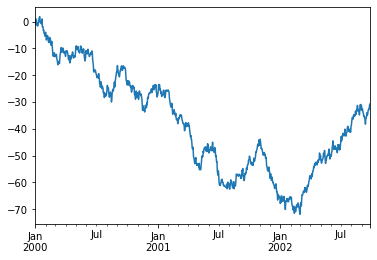

In [99]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()
ts.plot()

对于DataFrame类型，**plot()**能很方便地画出所有列及其标签

<Figure size 432x288 with 0 Axes>

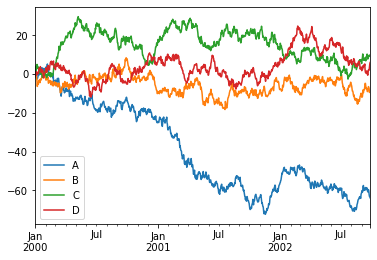

In [100]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
plt.figure(); df.plot(); plt.legend(loc='best')

# 获取数据的I/O

## CSV

写入一个csv文件

In [101]:
df.to_csv('data/foo.csv')

从一个csv文件读入

In [102]:
pd.read_csv('data/foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,1.091987,0.512331,2.090112,-1.022887
1,2000-01-02,-0.662103,0.203611,4.011730,-0.739768
2,2000-01-03,-1.830211,-0.062945,1.807569,-0.708766
3,2000-01-04,-2.169484,-1.200920,3.030045,0.514264
4,2000-01-05,-2.494627,-1.837390,2.581227,1.130991
...,...,...,...,...,...
995,2002-09-22,-60.210993,-6.917803,9.479894,1.999288
996,2002-09-23,-62.013790,-7.611377,9.296612,1.960964
997,2002-09-24,-63.074686,-9.560104,9.341058,3.461814
998,2002-09-25,-63.254196,-8.724835,9.758619,5.108110


## HDF5

HDFStores的读写

写入一个HDF5 Store

In [103]:
df.to_hdf('data/foo.h5', 'df')

ImportError: Missing optional dependency 'tables'.  Use pip or conda to install tables.

从一个HDF5 Store读入

In [104]:
pd.read_hdf('data/foo.h5', 'df')

ImportError: Missing optional dependency 'tables'.  Use pip or conda to install tables.

## Excel

MS Excel的读写

写入一个Excel文件

In [105]:
df.to_excel('data/foo.xlsx', sheet_name='Sheet1')

ModuleNotFoundError: No module named 'openpyxl'

从一个excel文件读入

In [106]:
pd.read_excel('data/foo.xlsx', 'Sheet1', index_col=None, na_values=['NA'])

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.